In [1]:
%matplotlib inline
# Dependencies and Setup
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
# Files to Load
city_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\city_data.csv"
ride_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


In [3]:
# Merge the two datasets 
combined_data_df = pd.merge(city_data_df, ride_data_df, on='city', how="left")
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
urban_data = combined_data_df[combined_data_df['type']=='Urban']
urban_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
suburban_data = combined_data_df[combined_data_df['type']=='Suburban']
suburban_data.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


In [6]:
rural_data = combined_data_df[combined_data_df['type']=='Rural']
rural_data.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [7]:
driver_data = combined_data_df[['driver_count']]
driver_data.head()

,driver_count
0,38
1,38
2,38
3,38
4,38


In [8]:
# Using .rename(columns={}) in order to rename columns
combined_data_df = combined_data_df.rename(columns={"type":"city_type"})
combined_data_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [9]:
# The total number of unique rides/cars
count_rides = combined_data_df["ride_id"].nunique()
count_rides

2375

In [10]:
# Using GroupBy in order to separate the data into fields according to "Urban City" values
urban_grouped_city_df = urban_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(urban_grouped_city_df)

# In order to be visualized, a data function must be used...
# urban_grouped_city_df.count()

In [11]:
#Average fare per urban city
Average_fare_per_urban_city = urban_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_urban_city.head()

,,fare
city,driver_count,
Amandaburgh,12,24.64
Barajasview,26,25.33
Carriemouth,52,28.31
Christopherfurt,41,24.50
Deanville,49,25.84


In [12]:
# Total No of Rides per urban city
rides_count_per_urban_city = urban_grouped_city_df[["ride_id"]].nunique()
rides_count_per_urban_city.head()

,,ride_id
city,driver_count,
Amandaburgh,12,18
Barajasview,26,22
Carriemouth,52,27
Christopherfurt,41,27
Deanville,49,19


In [13]:
# Using GroupBy in order to separate the data into fields according to "Suburban City" values
suburban_grouped_city_df = suburban_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(suburban_grouped_city_df)

# In order to be visualized, a data function must be used...
# suburban_grouped_city_df.count()

In [14]:
#Average fare per suburban city
Average_fare_per_suburban_city = suburban_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_suburban_city.head()

,,fare
city,driver_count,
Barronchester,11,36.42
Bethanyland,22,32.96
Brandonfort,10,35.44
Colemanland,23,30.89
Davidfurt,23,32.00


In [15]:
# Total No of Rides per suburban city
rides_count_per_suburban_city = suburban_grouped_city_df[["ride_id"]].nunique()
rides_count_per_suburban_city.head()

,,ride_id
city,driver_count,
Barronchester,11,16
Bethanyland,22,18
Brandonfort,10,19
Colemanland,23,22
Davidfurt,23,17


In [16]:
# Using GroupBy in order to separate the data into fields according to "Rural City" values
rural_grouped_city_df = rural_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(rural_grouped_city_df)

# In order to be visualized, a data function must be used...
# rural_grouped_city_df.count()

In [17]:
#Average fare per rural city
Average_fare_per_rural_city = rural_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_rural_city.head()

,,fare
city,driver_count,
Bradshawfurt,7,40.06
Garzaport,7,24.12
Harringtonfort,4,33.47
Jessicaport,1,36.01
Lake Jamie,4,34.36


In [18]:
# Total No of Rides per rural city
rides_count_per_rural_city = rural_grouped_city_df[["ride_id"]].nunique()
rides_count_per_rural_city.head()

,,ride_id
city,driver_count,
Bradshawfurt,7,10
Garzaport,7,3
Harringtonfort,4,6
Jessicaport,1,6
Lake Jamie,4,6


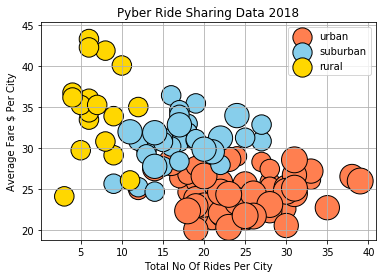

In [19]:
#define data
x1 = rides_count_per_urban_city['ride_id']
y1 = Average_fare_per_urban_city['fare']
x2 = rides_count_per_suburban_city['ride_id']
y2 = Average_fare_per_suburban_city['fare']
x3 = rides_count_per_rural_city['ride_id']
y3 = Average_fare_per_rural_city['fare']
z = driver_data

plt.ylabel('Average Fare $ Per City')
plt.xlabel('Total No Of Rides Per City')
plt.title('Pyber Ride Sharing Data 2018')


plt.scatter(x1, y1, marker='o', label='urban', s=z*10, c='coral' , alpha=1, edgecolors='black')
plt.scatter(x2, y2, marker='o', label='suburban', s=z*10, c='skyblue', alpha=1, edgecolors='black')
plt.scatter(x3, y3, marker='o', label='rural', s=z*10, c='gold', alpha=1, edgecolors='black')
# Plot legend.
plt.legend(loc="upper right", markerscale=1., scatterpoints=1, fontsize=10)
plt.grid(True)
plt.show()


In [20]:
# Using .rename(columns={}) in order to rename columns
combined_data_df = combined_data_df.rename(columns={"type":"city_type"})
combined_data_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [21]:
# Total No of Rides per City Type
total_rides_per_citytype = combined_data_df["city_type"].value_counts()
total_rides_per_citytype

Urban       1625
Suburban     625
Rural        125
Name: city_type, dtype: int64

(-1.1462471472214952,
 1.0857823755471938,
 -1.2154088386572095,
 1.1110419969545224)

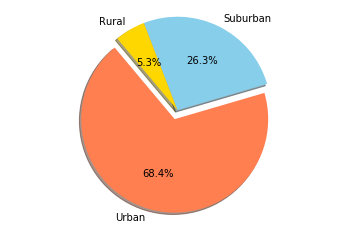

In [22]:
city_type = ["Urban", "Suburban", "Rural"]
colors = ["coral","skyblue","gold"]
explode = (0.1,0,0)
title = "Total Rides By City Types"

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_rides_per_citytype, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [23]:
# Using GroupBy in order to separate the data into fields according to "City Type" values
grouped_city_df = combined_data_df.groupby(['city_type'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_city_df)

# In order to be visualized, a data function must be used...
# grouped_city_df.sum()

In [24]:
# Total fares by City Type
total_fares_per_citytype = grouped_city_df[["fare"]].sum()
total_fares_per_citytype

,fare
city_type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


(-1.1211543472819667,
 1.2907424947344492,
 -1.1146562060416572,
 1.208924787416114)

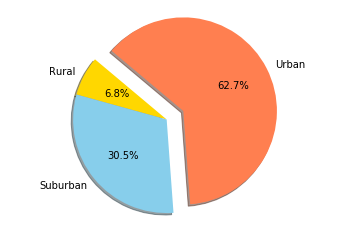

In [36]:
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold","skyblue","coral"]
explode = (0,0,0.2)
title = "Total Fares By City Types"

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_fares_per_citytype['fare'], explode=explode, colors=colors, labels=city_type,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [26]:
# Total drivers by City Type
total_drivers_per_citytype = (grouped_city_df["driver_count"].nunique())
#total_drivers_per_citytype = total_drivers_per_citytype.sum()
total_drivers_per_citytype


city_type
Rural        7
Suburban    18
Urban       45
Name: driver_count, dtype: int64

(-1.1124154412294376,
 1.2069916397210718,
 -1.1024171116109742,
 1.1575972847926566)

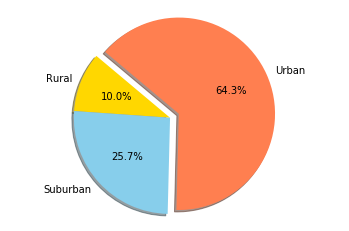

In [37]:
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold","skyblue","coral"]
explode = (0,0,0.1)
title = "Total Drivers By City Types"

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_drivers_per_citytype, explode=explode, colors=colors, labels=city_type,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [27]:
# Using GroupBy in order to separate the data into fields according to "City Type" values
grouped_city_df1 = combined_data_df.groupby(['city'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_city_df1)

# In order to be visualized, a data function must be used...
grouped_city_df1.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
29,Williamsstad,59,Urban,2018-03-29 21:43:04,35.58,4747780858464
30,Williamsstad,59,Urban,2018-02-13 20:07:49,33.72,3796713212942
31,Williamsstad,59,Urban,2018-05-01 01:26:21,26.81,4542954169892
32,Williamsstad,59,Urban,2018-02-23 17:42:40,4.68,9109973457376


In [28]:
i = combined_data_df["city"].unique()
i
# The unique method shows every element of the series that appears only once
# unique = data_file_pd["Last Name"].unique()
# unique

array(['Richardfort', 'Williamsstad', 'Port Angela', 'Rodneyfort',
       'West Robert', 'West Anthony', 'West Angela', 'Martinezhaven',
       'Karenberg', 'Barajasview', 'Robertport', 'Joneschester',
       'Leahton', 'West Christopherberg', 'Johnton', 'Reynoldsfurt',
       'Port David', 'New Kimberlyborough', 'Carriemouth', 'Rogerston',
       'Jerryton', 'Loganberg', 'Simpsonburgh', 'Port Frank',
       'South Latoya', 'West Samuelburgh', 'Grahamburgh',
       'West Patrickchester', 'North Madeline', 'South Jack', 'Liumouth',
       'West Ericstad', 'Royland', 'Erikaland', 'Huntermouth',
       'Justinberg', 'South Evanton', 'Lake Danielberg',
       'East Kaylahaven', 'West Heidi', 'Karenside', 'South Karenland',
       'West Gabriel', 'North Markport', 'Raymondhaven', 'North Barbara',
       'Lake Scottton', 'West Josephberg', 'Pattyland',
       'South Michelleport', 'Christopherfurt', 'Valentineton',
       'South Phillip', 'North Jason', 'Deanville', 'Lake Jonathanshire',
   

In [29]:
i_upcount = ((combined_data_df["city"])["driver_count"].nunique())
i_upcount

KeyError: 'driver_count'